In [4]:
from typing import List
from Bio import SeqIO
from Bio.SubsMat import MatrixInfo
from Bio.pairwise2 import align

def generate_similarity_matrix(sequences: List[str]) -> List[List[float]]:
    # Generate a similarity matrix
    matrix = []
    for i in range(len(sequences)):
        row = []
        for j in range(len(sequences)):
            # Use the Needleman-Wunsch algorithm to align the two sequences
            alignments = align.globaldx(sequences[i], sequences[j], MatrixInfo.blosum62)
            # Calculate the similarity score as the percentage of identical residues
            identical_residues = sum(a == b for a, b in zip(*alignments[0][:2]))
            similarity = identical_residues / len(alignments[0][0])
            row.append(similarity)
        matrix.append(row)
    return matrix

# Load sequences from a FASTA file
sequences = []
for record in SeqIO.parse("test/Published_PETases_90.fasta", "fasta"):
    sequences.append(str(record.seq))

# Generate and print the similarity matrix
similarity_matrix = generate_similarity_matrix(sequences)
for row in similarity_matrix:
    print(" ".join("{:.6f}".format(score) for score in row))

/home/maxim/.local/lib/python3.8/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


1.000000 0.434447 0.405195 0.571023 0.450262 0.415816 0.425258 0.266504 0.360577 0.231383 0.406650 0.684685 0.419271 0.399015 0.416667 0.420103 0.403794 0.411616 0.382134 0.203583 0.391781 0.305907 0.306383 0.455729 0.246285 0.253769 0.229730
0.435897 1.000000 0.451282 0.440506 0.520107 0.483290 0.489529 0.269048 0.380723 0.223350 0.481865 0.446753 0.374384 0.368171 0.411028 0.376214 0.386423 0.407407 0.358354 0.227200 0.365285 0.289474 0.294715 0.492228 0.231557 0.239609 0.222506
0.405195 0.451282 1.000000 0.428941 0.437824 0.434447 0.430412 0.277108 0.404938 0.226562 0.441558 0.420103 0.370927 0.378049 0.355164 0.355392 0.391534 0.385965 0.363415 0.218954 0.373333 0.273101 0.281314 0.437340 0.228814 0.232673 0.226913
0.571023 0.440506 0.427835 1.000000 0.443590 0.439589 0.437824 0.260241 0.364303 0.233596 0.438462 0.588571 0.424165 0.435000 0.423377 0.412821 0.423913 0.434010 0.432161 0.207516 0.416894 0.298755 0.294737 0.463542 0.229814 0.243842 0.216146
0.449086 0.521277 0.438961 0

In [5]:
import pandas as pd
from Bio import SeqIO
# Load sequences and sequence IDs from a FASTA file
sequences = []
sequence_ids = []
for record in SeqIO.parse("test/Published_PETases_90.fasta", "fasta"):
    sequences.append(str(record.seq))
    sequence_ids.append(record.id)

# Generate similarity matrix
similarity_matrix = generate_similarity_matrix(sequences)

# Convert the similarity matrix into a dataframe with sequence IDs as row and column labels
similarity_matrix_df = pd.DataFrame(similarity_matrix, columns=sequence_ids, index=sequence_ids)

# Print the dataframe
print(similarity_matrix_df)


           IsPETase      PET5      PET6     PET12    PpCutA  PpelaLip  \
IsPETase   1.000000  0.434447  0.405195  0.571023  0.450262  0.415816   
PET5       0.435897  1.000000  0.451282  0.440506  0.520107  0.483290   
PET6       0.405195  0.451282  1.000000  0.428941  0.437824  0.434447   
PET12      0.571023  0.440506  0.427835  1.000000  0.443590  0.439589   
PpCutA     0.449086  0.521277  0.438961  0.443590  1.000000  0.686957   
PpelaLip   0.418367  0.484536  0.435567  0.440722  0.686957  1.000000   
PE-H       0.426735  0.490862  0.432990  0.439276  0.684971  0.668555   
PmC        0.266504  0.270784  0.280193  0.259615  0.282238  0.277108   
Mors1      0.361858  0.380723  0.403465  0.360494  0.386308  0.390777   
PpEst      0.229333  0.224490  0.226562  0.232984  0.227979  0.224227   
Esterase   0.407125  0.484536  0.443005  0.437018  0.633803  0.639665   
RgPETase   0.684685  0.446475  0.417526  0.590258  0.450521  0.434783   
LCC        0.415144  0.374384  0.368421  0.425641  

In [6]:
import pandas as pd
from Bio import SeqIO

# Define a function to generate the distance matrix
def generate_distance_matrix(similarity_matrix, names):
    distance_matrix = []
    for i, row in enumerate(similarity_matrix):
        distance_row = [1 - score for score in row]
        distance_matrix.append(distance_row)
    return pd.DataFrame(distance_matrix, index=names, columns=names)

# Parse the fasta file and get the sequences
sequences = []
names = []
for record in SeqIO.parse("test/Published_PETases_90.fasta", "fasta"):
    names.append(record.id)
    sequences.append(str(record.seq))

# Generate the similarity matrix
similarity_matrix = generate_similarity_matrix(sequences)

# Generate the distance matrix
distance_matrix = generate_distance_matrix(similarity_matrix, names)

# Print the distance matrix
print(distance_matrix)

           IsPETase      PET5      PET6     PET12    PpCutA  PpelaLip  \
IsPETase   0.000000  0.565553  0.594805  0.428977  0.549738  0.584184   
PET5       0.564103  0.000000  0.548718  0.559494  0.479893  0.516710   
PET6       0.594805  0.548718  0.000000  0.571059  0.562176  0.565553   
PET12      0.428977  0.559494  0.572165  0.000000  0.556410  0.560411   
PpCutA     0.550914  0.478723  0.561039  0.556410  0.000000  0.313043   
PpelaLip   0.581633  0.515464  0.564433  0.559278  0.313043  0.000000   
PE-H       0.573265  0.509138  0.567010  0.560724  0.315029  0.331445   
PmC        0.733496  0.729216  0.719807  0.740385  0.717762  0.722892   
Mors1      0.638142  0.619277  0.596535  0.639506  0.613692  0.609223   
PpEst      0.770667  0.775510  0.773438  0.767016  0.772021  0.775773   
Esterase   0.592875  0.515464  0.556995  0.562982  0.366197  0.360335   
RgPETase   0.315315  0.553525  0.582474  0.409742  0.549479  0.565217   
LCC        0.584856  0.625616  0.631579  0.574359  

In [7]:
import numpy as np
import pandas as pd

threshold = 0.6


# Convert dataframe to numpy array
arr = np.array(distance_matrix)

# Iterate over numpy array and remove values below threshold
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if arr[i][j] > threshold:
            arr[i][j] = np.nan

# Convert numpy array back to dataframe
distance_matrix_thr = pd.DataFrame(arr, columns=distance_matrix.columns, index=distance_matrix.index)

distance_matrix_thr.fillna(0, inplace=True)

# print the updated DataFrame
print(distance_matrix_thr)

           IsPETase      PET5      PET6     PET12    PpCutA  PpelaLip  \
IsPETase   0.000000  0.565553  0.594805  0.428977  0.549738  0.584184   
PET5       0.564103  0.000000  0.548718  0.559494  0.479893  0.516710   
PET6       0.594805  0.548718  0.000000  0.571059  0.562176  0.565553   
PET12      0.428977  0.559494  0.572165  0.000000  0.556410  0.560411   
PpCutA     0.550914  0.478723  0.561039  0.556410  0.000000  0.313043   
PpelaLip   0.581633  0.515464  0.564433  0.559278  0.313043  0.000000   
PE-H       0.573265  0.509138  0.567010  0.560724  0.315029  0.331445   
PmC        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mors1      0.000000  0.000000  0.596535  0.000000  0.000000  0.000000   
PpEst      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Esterase   0.592875  0.515464  0.556995  0.562982  0.366197  0.360335   
RgPETase   0.315315  0.553525  0.582474  0.409742  0.549479  0.565217   
LCC        0.584856  0.000000  0.000000  0.574359  

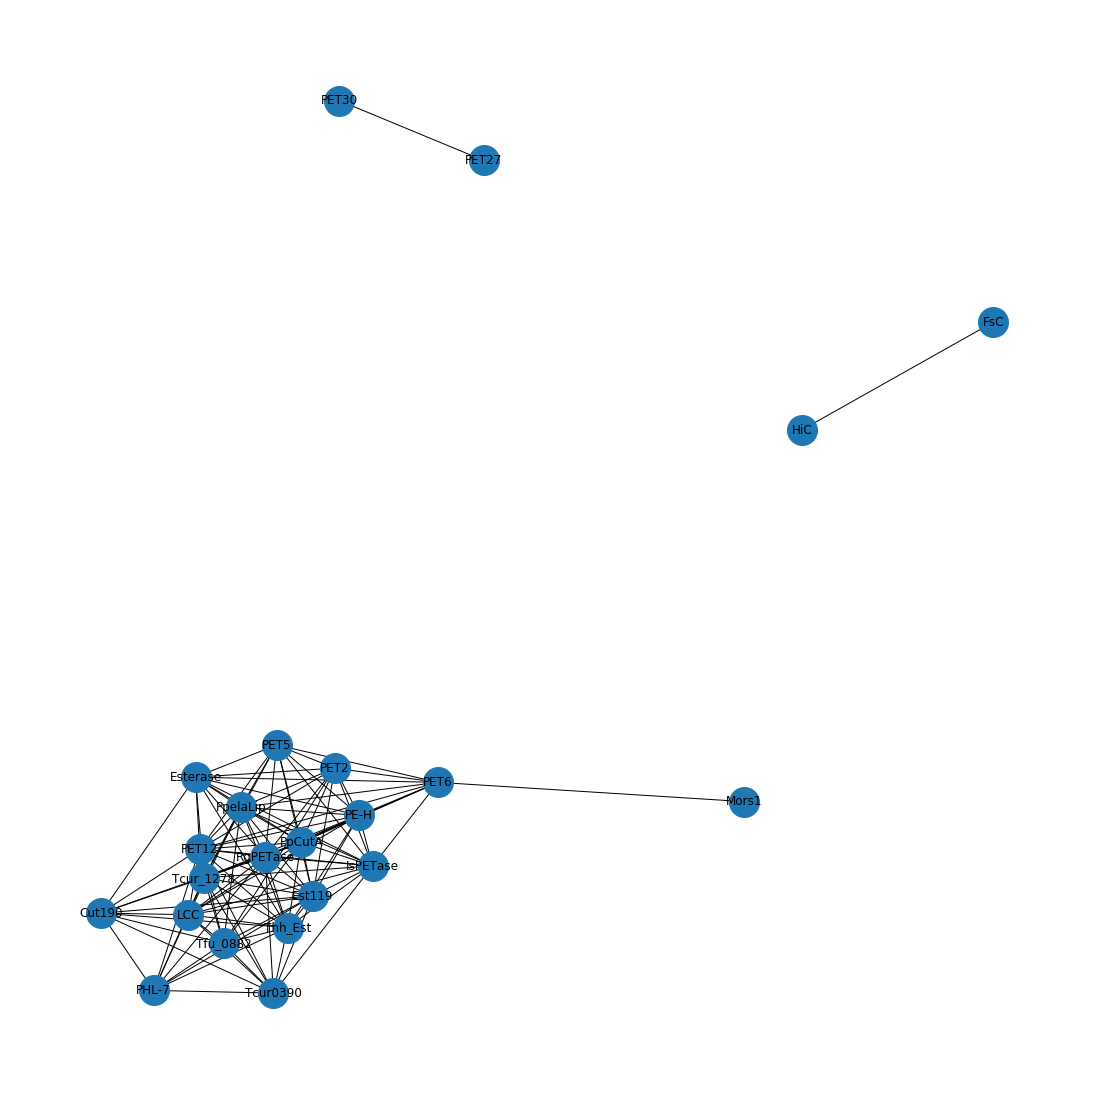

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.from_pandas_adjacency(distance_matrix_thr)

# Remove nodes with 0 connections
G.remove_nodes_from(list(nx.isolates(G)))

# Set an edge threshold
edge_threshold = 0.6

# Remove edges below the threshold
for edge in G.edges():
    if G.get_edge_data(edge[0], edge[1])['weight'] > edge_threshold:
        G.remove_edge(edge[0], edge[1])

# Use spring layout to position the nodes
pos = nx.spring_layout(G,k=0.15, iterations=20,scale=1)

# Set the node size
node_size = 900

# Draw the graph with labels, the spring layout positions, and the node size
plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos, with_labels=True, node_size=node_size)
plt.show()